## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# uncomment the following lines if Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##  Complete the code to read the data
Loan = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_learning/Project2_Personal_loan_campaign/Loan_Modelling.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
# View first five rows of data set
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# View last five rows of data set
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
# Get the number of rows and columns in the dataset
data.shape

(5000, 14)

In [ ]:
# view information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#View the statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Check the total sum of null values in the dataset
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
# Check and count the number of duplicate rows in the dataset
data.duplicated().sum()

0

**Observations**
1. Shape: 5,000 rows, 14 columns.
2. Missing Values: No missing values in any column.
3. Duplicates: No duplicate records found.
4. Feature Types: Mostly integer-based, except CCAvg (float).
5. Potential Outliers: Income, CCAvg, and Mortgage have high variance.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions and Answres**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

  The "Mortgage" attribute distribution is highly skewed to the right, with the majority of customers (approximately 65%) having a mortgage value of zero. A smaller subset of customers has significantly higher mortgage amounts (up to 635), indicating the presence of outliers or customers with substantially larger mortgages.

2. How many customers have credit cards?

  1470 customers (29.4%) have credit cards.

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

  - Income (0.502): Strong positive correlation.
  - CCAvg (0.367): Moderate positive correlation.
  - CD_Account (0.316): Moderate positive correlation.
  - Mortgage (0.142): Weak positive correlation.
  - Education (0.137): Weak positive correlation.

4. How does a customer's interest in purchasing a loan vary with their age?

  The correlation between Age and Personal_Loan is -0.0077, indicating a negligible negative correlation. Practically, this means age does not significantly affect the likelihood of a customer purchasing a personal loan.

5. How does a customer's interest in purchasing a loan vary with their education?

  The correlation between Education and Personal_Loan is 0.137, indicating a weak but noticeable positive correlation. This suggests customers with advanced education are slightly more inclined to accept personal loan offers compared to less educated counterparts.

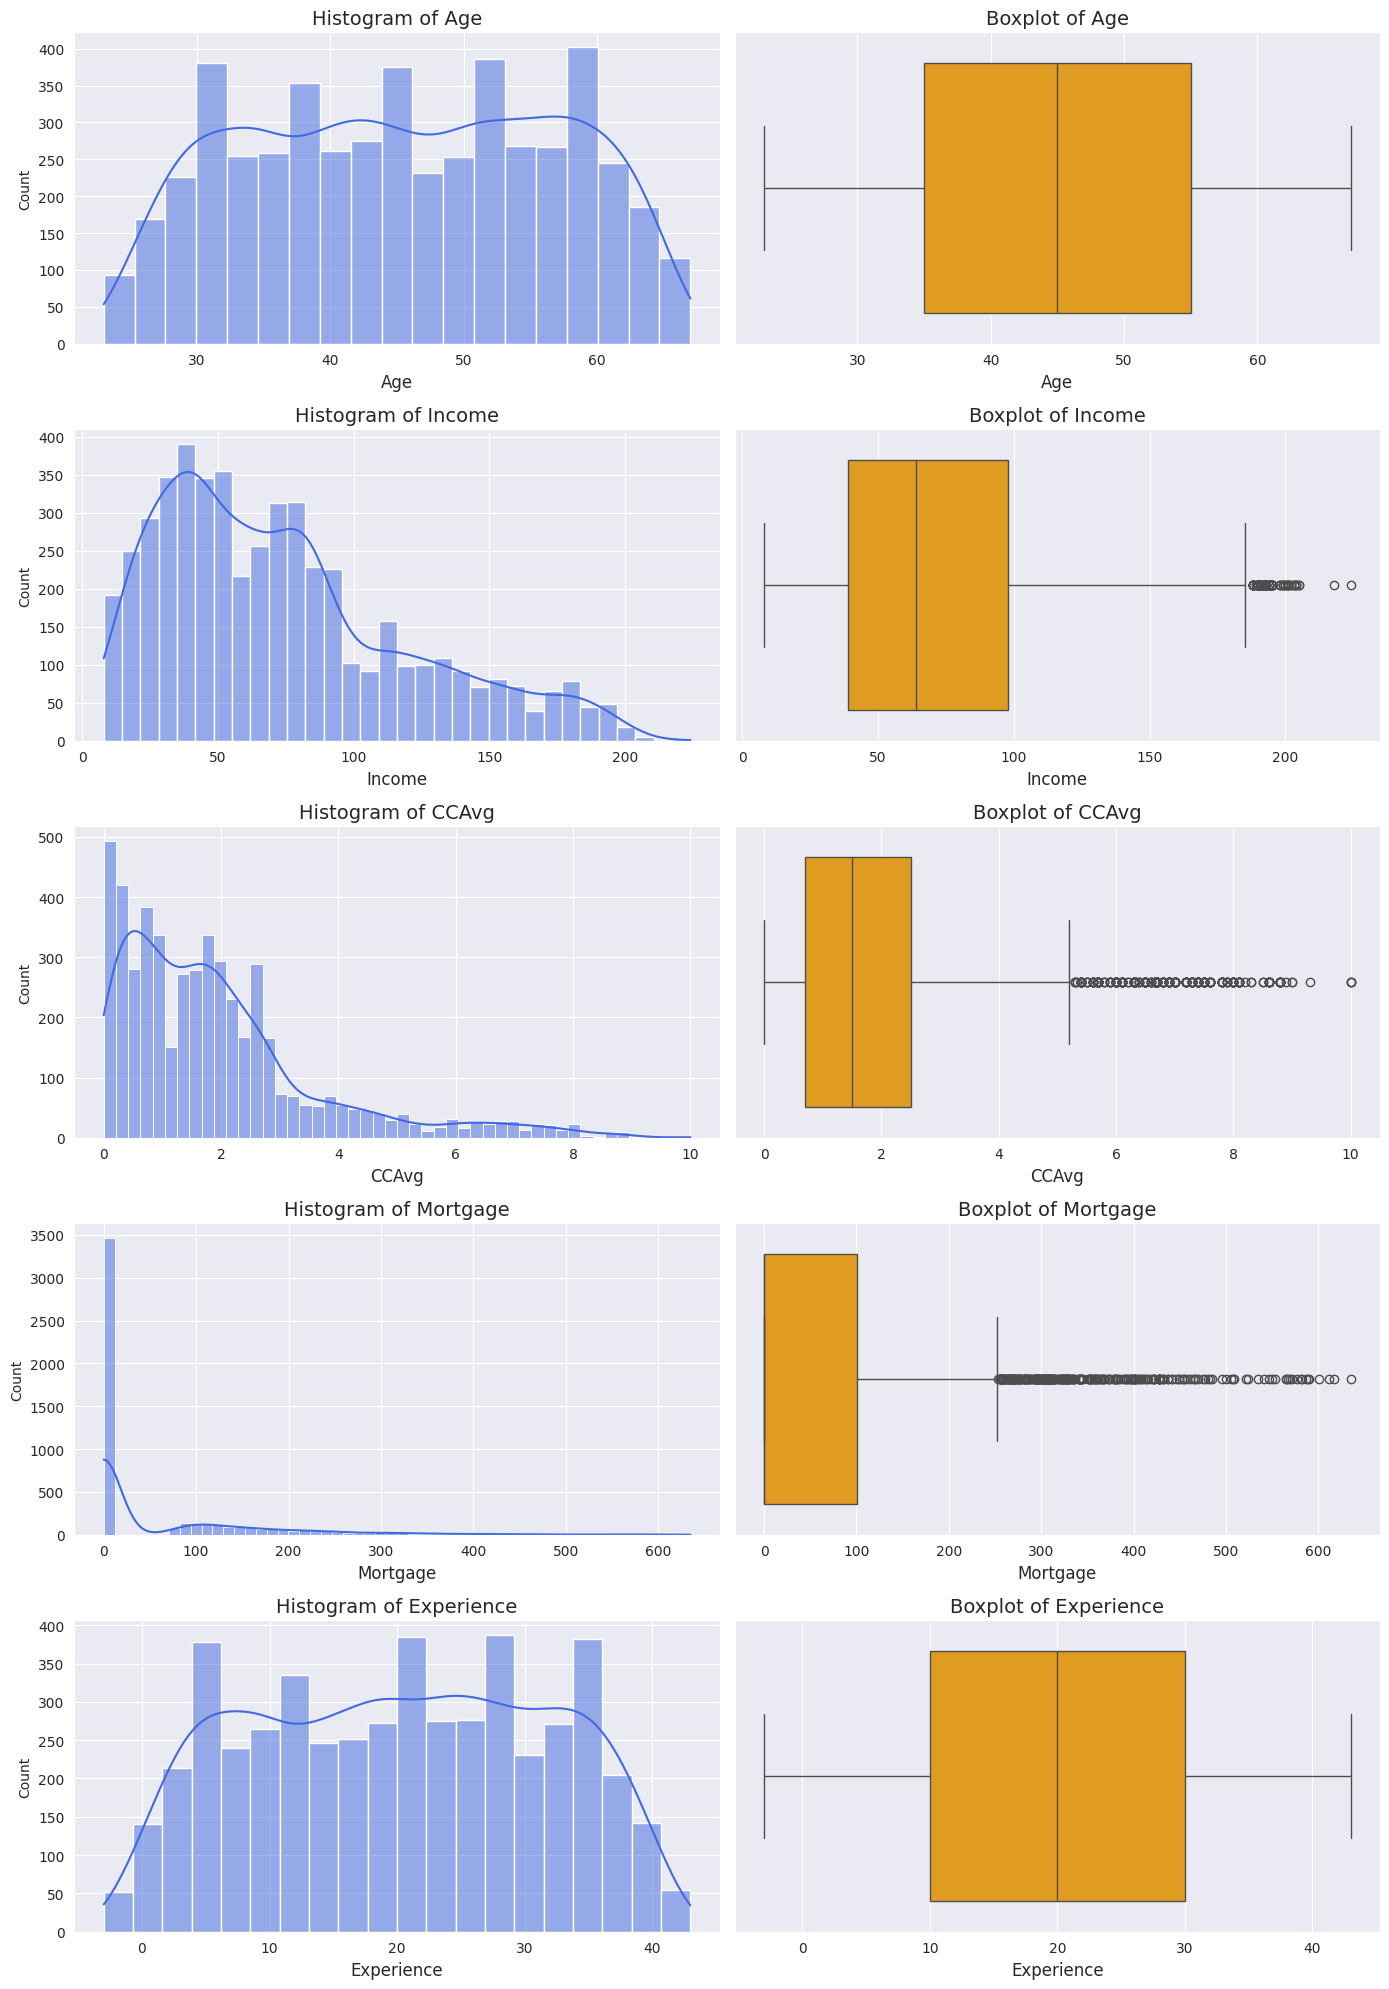

In [ ]:
# Plot the distribution of all numerical columns to analyze their patterns and detect outliers.

# Set visualization style
sns.set_style("darkgrid")

# Define numerical columns
num_columns = ['Age', 'Income', 'CCAvg', 'Mortgage', 'Experience']

# Create subplots dynamically
fig, axes = plt.subplots(nrows=len(num_columns), ncols=2, figsize=(14, len(num_columns) * 4))

for i, column in enumerate(num_columns):
    # Histogram with KDE
    sns.histplot(data[column], kde=True, ax=axes[i, 0], color="royalblue")
    axes[i, 0].set_title(f"Histogram of {column}", fontsize=14)
    axes[i, 0].set_xlabel(column, fontsize=12)

    # Boxplot
    sns.boxplot(x=data[column], ax=axes[i, 1], color="orange")
    axes[i, 1].set_title(f"Boxplot of {column}", fontsize=14)
    axes[i, 1].set_xlabel(column, fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

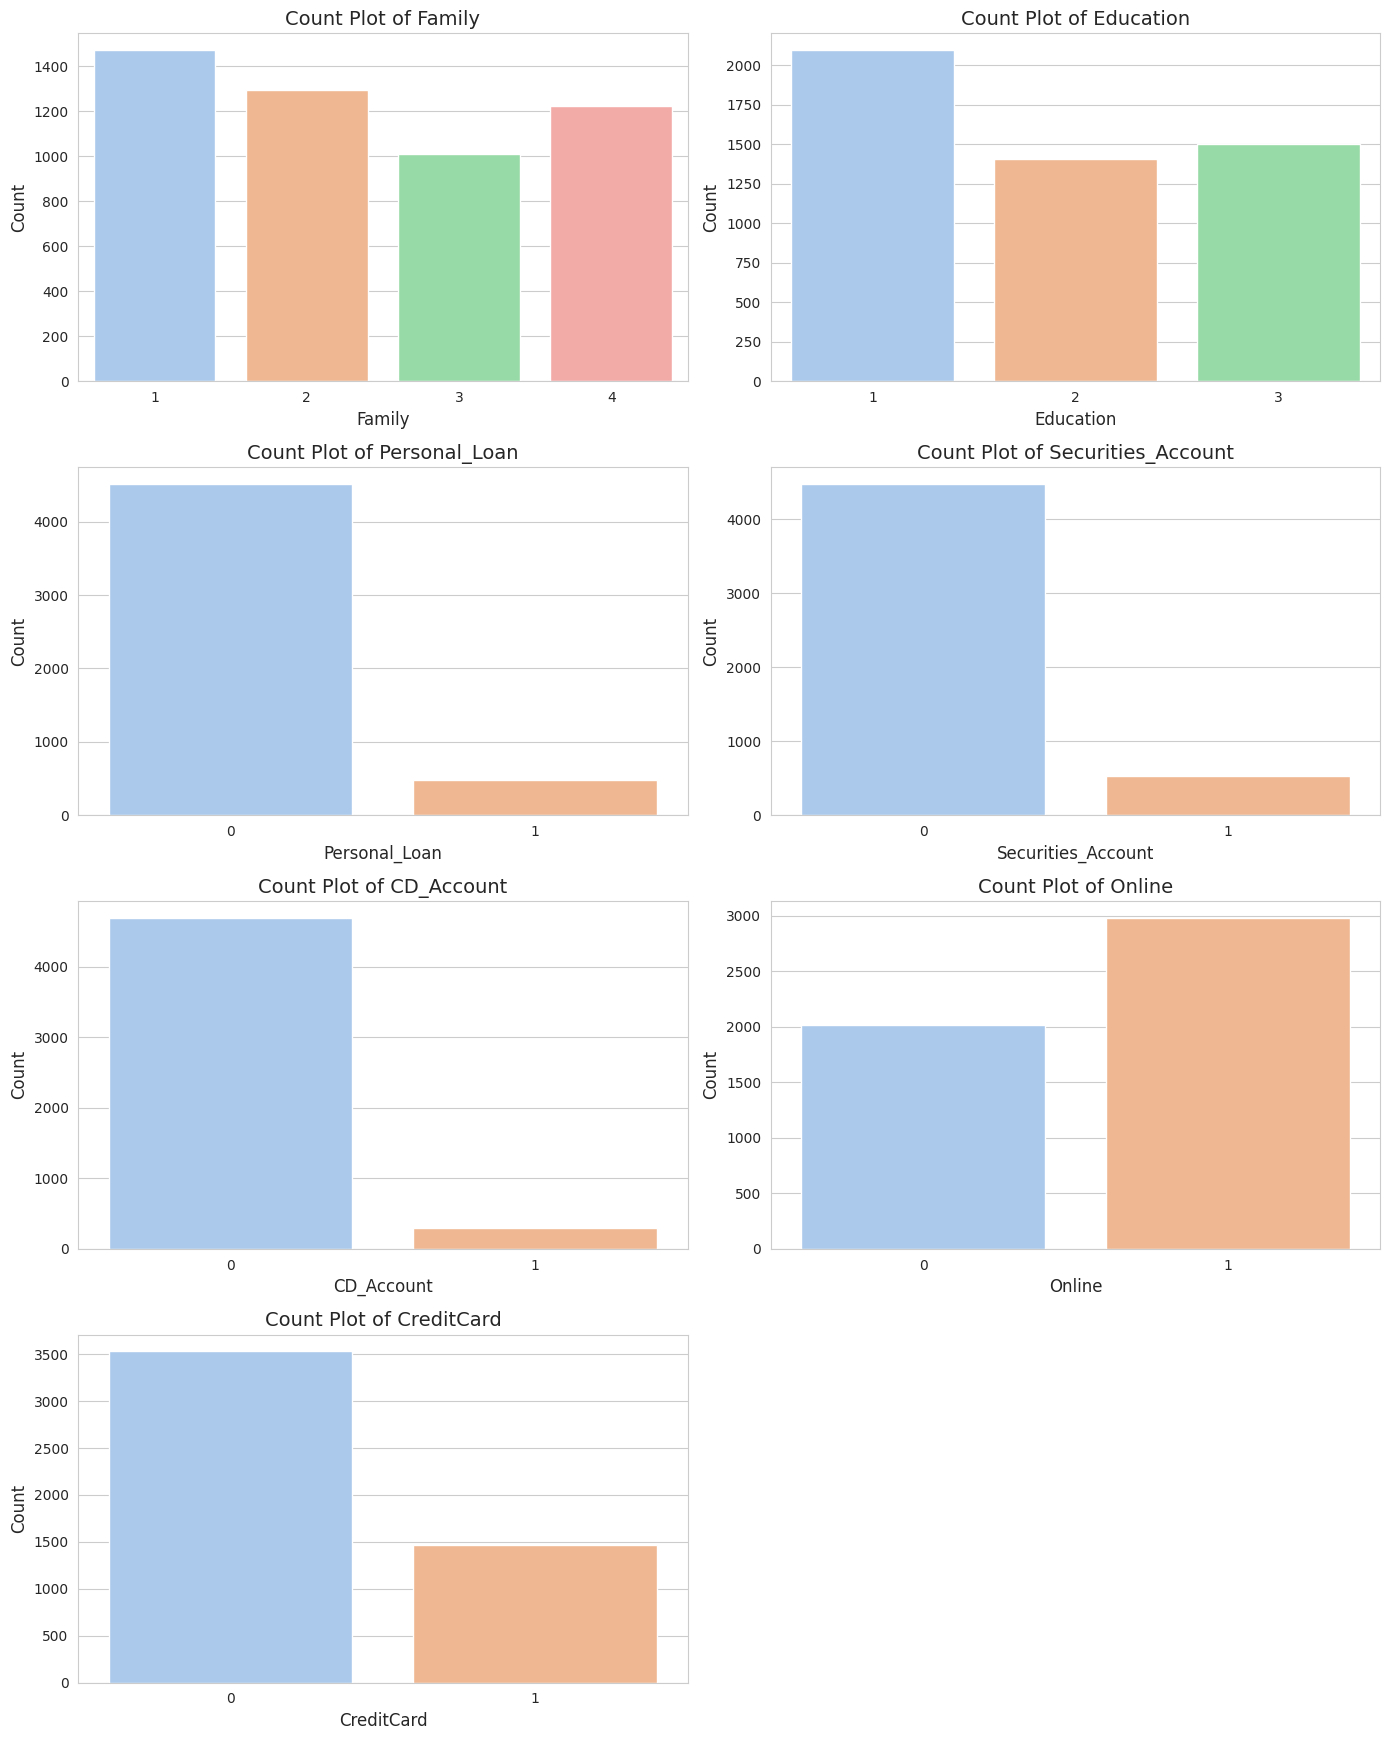

In [ ]:
# # Visualize the distribution of all categorical columns to analyze frequency patterns and class imbalances.

# Set visualization style
sns.set_style("whitegrid")

# Define categorical columns
cat_columns = ['Family', 'Education', 'Personal_Loan', 'Securities_Account',
               'CD_Account', 'Online', 'CreditCard']

# Create subplots dynamically
fig, axes = plt.subplots(nrows=len(cat_columns)//2 + len(cat_columns)%2, ncols=2, figsize=(14, len(cat_columns) * 2.5))

# Flatten axes for easy iteration (handles odd number of plots)
axes = axes.flatten()

for i, column in enumerate(cat_columns):
    sns.countplot(x=data[column], ax=axes[i], palette="pastel")
    axes[i].set_title(f"Count Plot of {column}", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)  # Ensures readable x-axis labels

# Remove any empty subplots in case of an odd number of plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

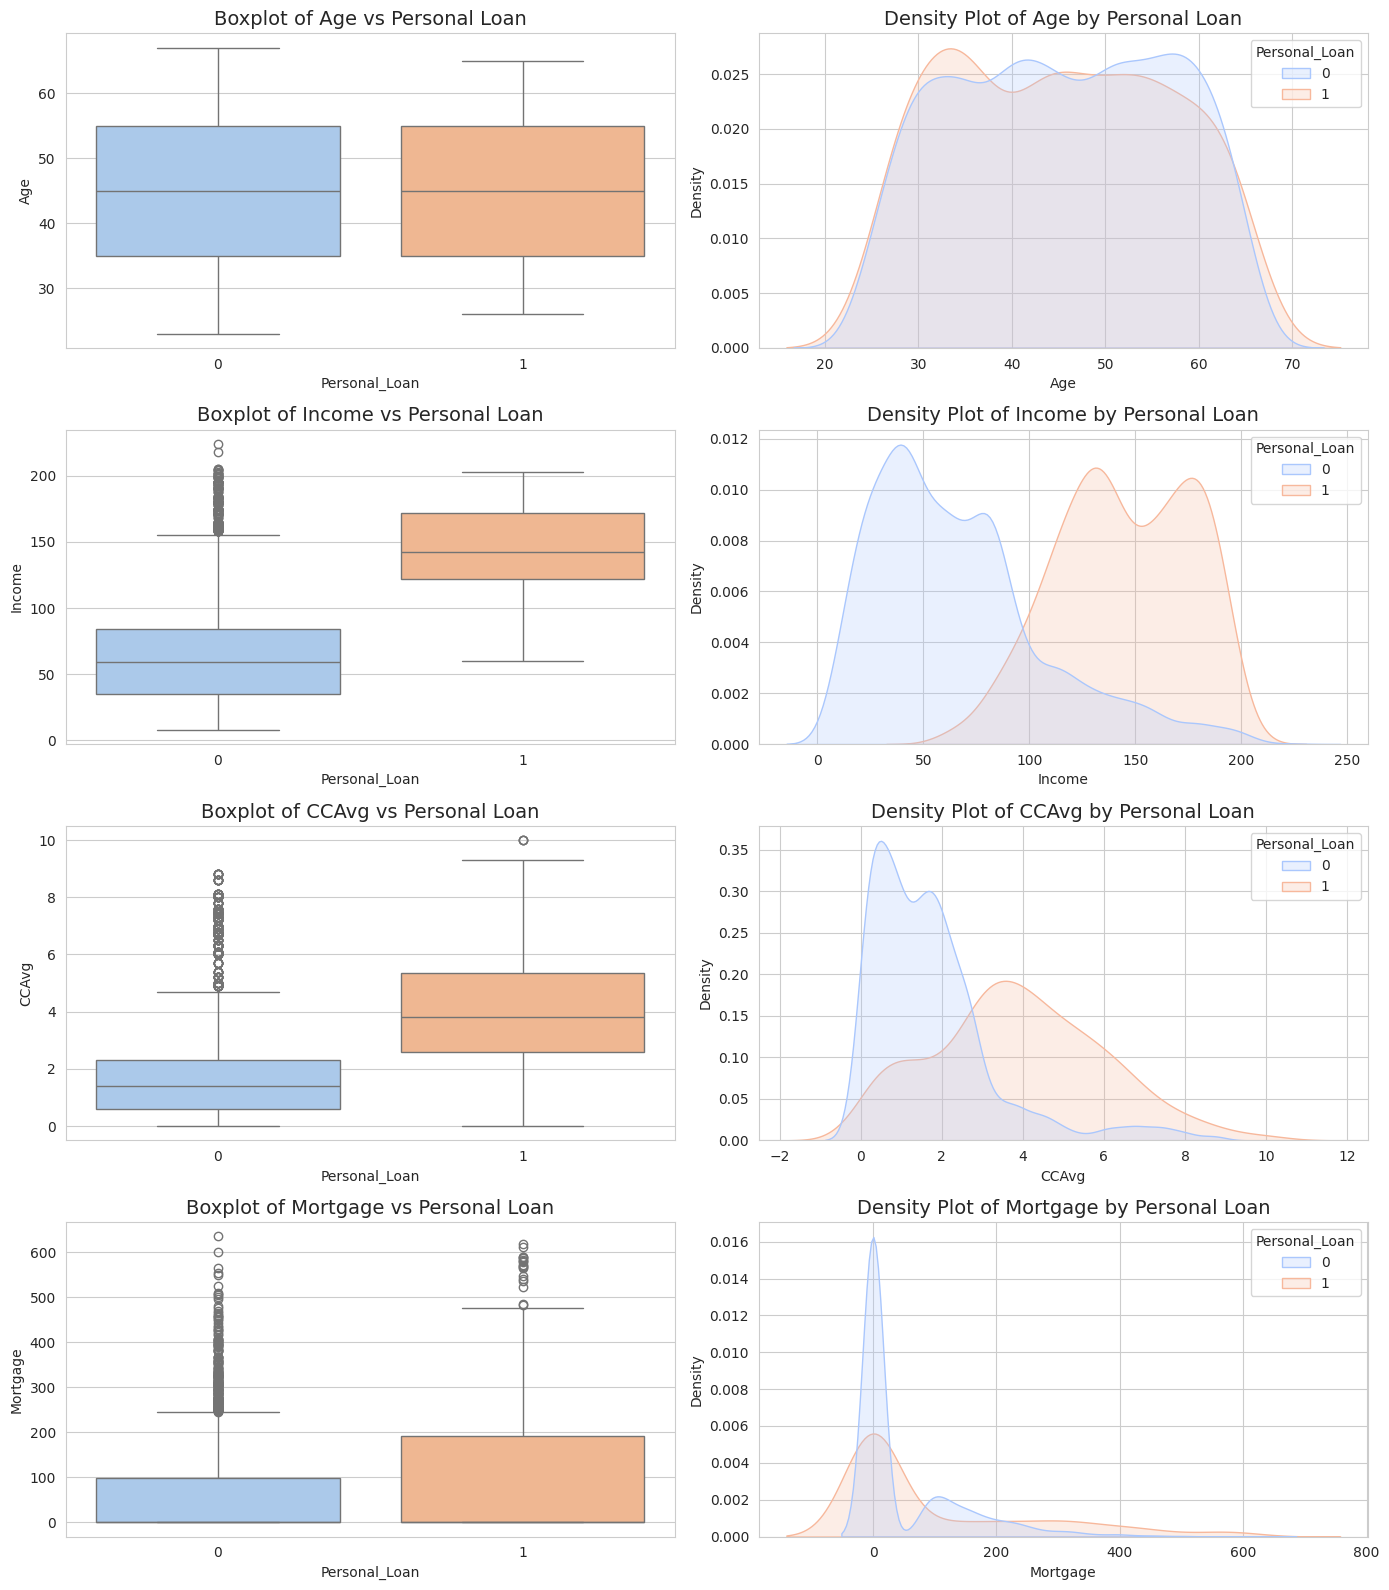

In [ ]:
# Numerical columns to compare with Personal_Loan
num_columns = ['Age', 'Income', 'CCAvg', 'Mortgage']

# Create subplots dynamically
fig, axes = plt.subplots(nrows=len(num_columns), ncols=2, figsize=(14, len(num_columns) * 4))

for i, col in enumerate(num_columns):
    # Boxplot
    sns.boxplot(x=data["Personal_Loan"], y=data[col], ax=axes[i, 0], palette="pastel")
    axes[i, 0].set_title(f"Boxplot of {col} vs Personal Loan", fontsize=14)

    # KDE Plot
    sns.kdeplot(data=data, x=col, hue="Personal_Loan", fill=True, common_norm=False, palette="coolwarm", ax=axes[i, 1])
    axes[i, 1].set_title(f"Density Plot of {col} by Personal Loan", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

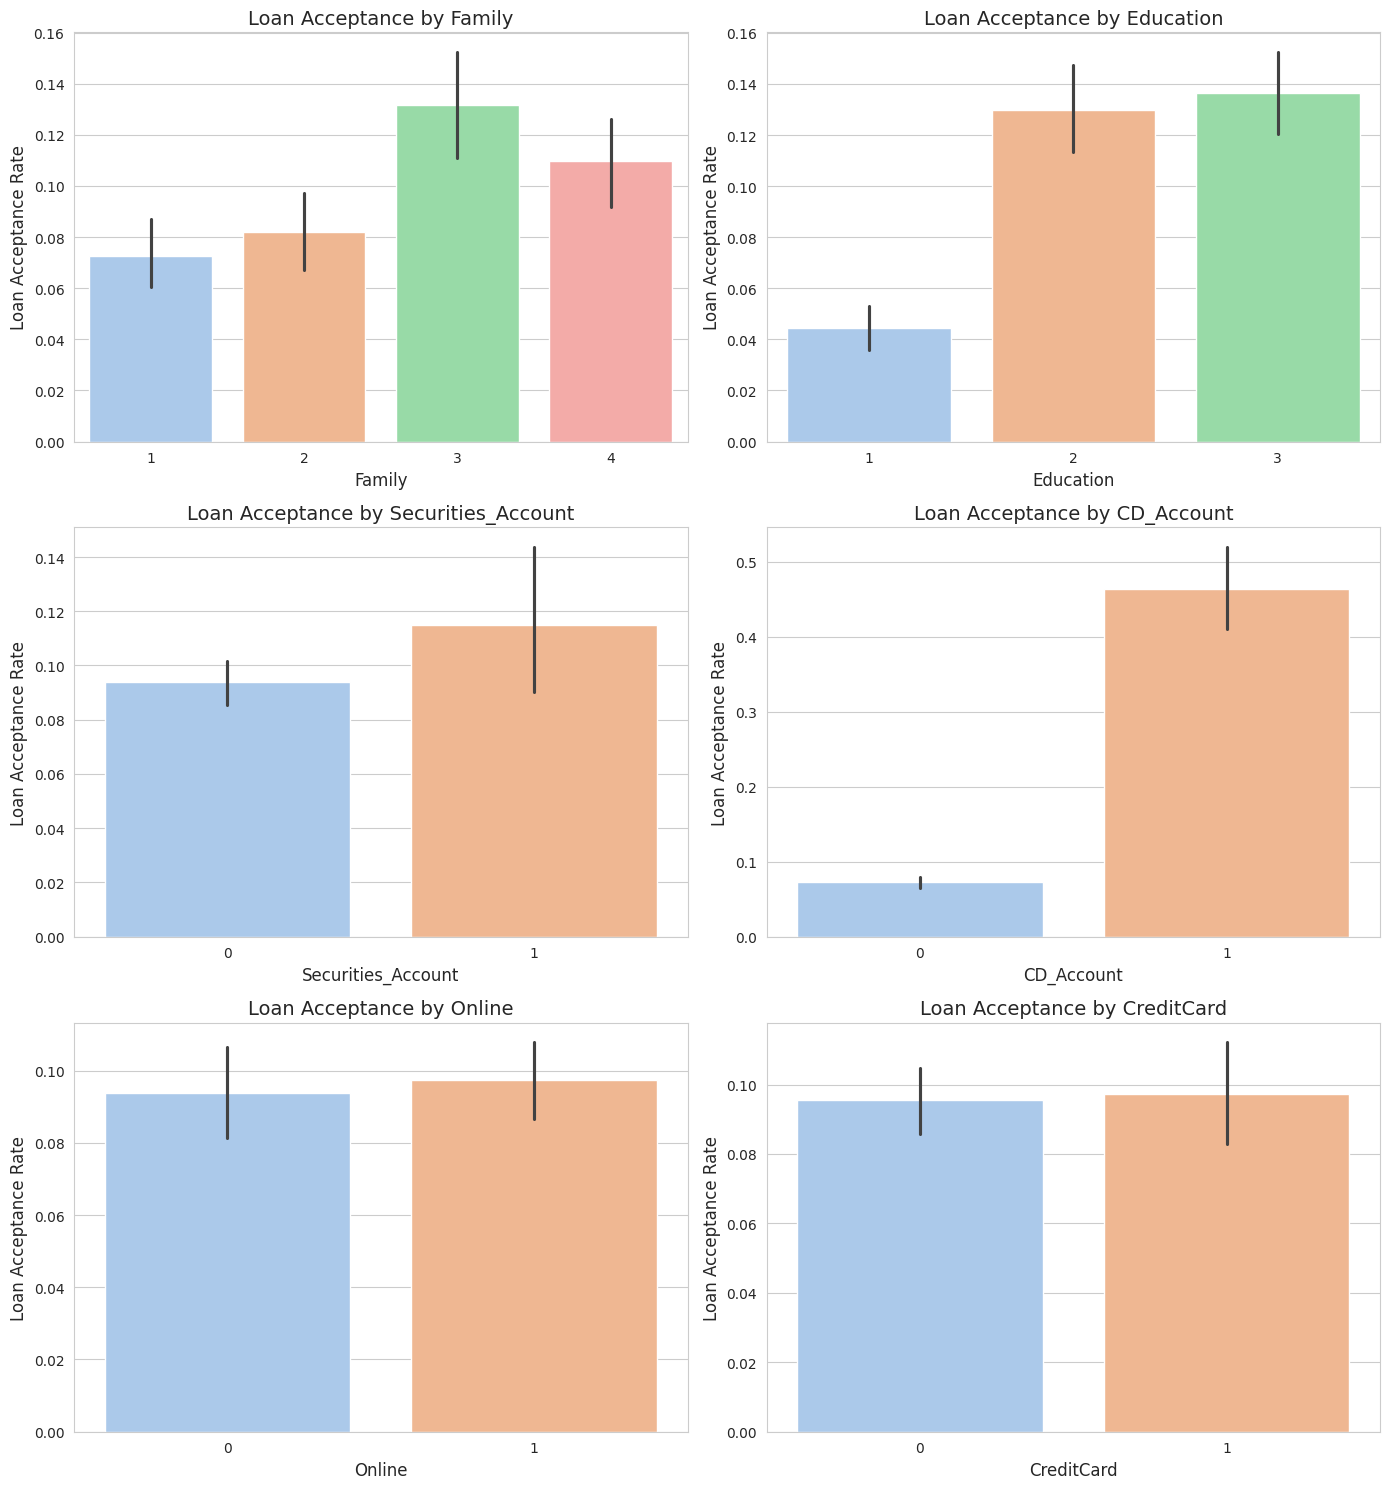

In [ ]:
# Define categorical columns to analyze with Personal_Loan
cat_columns = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

# Create subplots dynamically
fig, axes = plt.subplots(nrows=len(cat_columns)//2 + len(cat_columns)%2, ncols=2, figsize=(14, len(cat_columns) * 2.5))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.barplot(x=data[col], y=data["Personal_Loan"], ax=axes[i], palette="pastel")
    axes[i].set_title(f"Loan Acceptance by {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Loan Acceptance Rate", fontsize=12)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

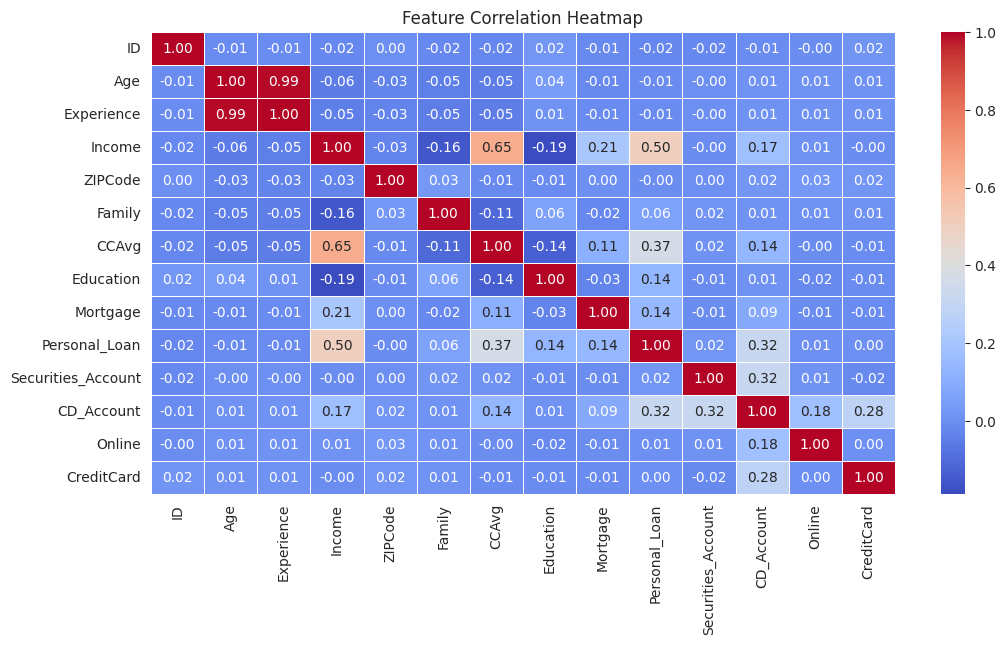

In [ ]:
# Compute correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Univariate Analysis (Individual Feature Distributions)**

1. Age:
  * Normally distributed with most customers in the 30-60 age range.
  * No strong skewness observed.
2. Income:
  * Right-skewed (most customers have lower incomes, with a few high-income outliers).
  * Outliers indicate some high-net-worth individuals, which could be key loan customers.
3. CCAvg (Credit Card Avg Spending per month):
  * Right-skewed (majority of customers have low spending, but some have very high credit card usage).
  * Customers with higher CCAvg may be more financially active.
4. Mortgage:
  * Many customers have zero mortgage, meaning they don’t own homes or have paid off their loans.
  * A few extreme outliers with very high mortgage values.
5. Education:
  * Customers with Graduate (Level 2) and Advanced/Professional (Level 3) degrees are more common.
  * Higher education levels may be linked to better financial awareness and higher income.
6. Family Size:
  * Most customers have 2-4 family members.
  * Very few single-member families.
7. Securities & CD Accounts:
  * Most customers do NOT have a Securities or CD Account.
  * Customers who do have these accounts may be wealthier and manage their investments.
8. Online Banking Usage:
  * Majority of customers use online banking, but a significant portion doesn’t.
9. Credit Card Usage:
  * Almost equally split between those who use a credit card (from another bank) and those who don’t.
10. Personal Loan (Target Variable):
  * Highly Imbalanced → Most customers did not take the loan (~90% No, ~10% Yes).


**Bivariate Analysis (Feature Relationships & Loan Acceptance)**
1. Income vs. Personal Loan:
  * Customers with higher incomes are more likely to accept a personal loan.
  * Those earning above 100K show a sharp increase in loan acceptance.
2. CCAvg vs. Personal Loan:
  * Higher credit card spending correlates with higher loan acceptance.
  * Customers with CCAvg > $2.5K/month are more likely to take loans.
3. Education vs. Personal Loan:
  * Customers with Advanced/Professional Education (Level 3) accept more loans.
  * Higher education may improve creditworthiness & financial knowledge.
4. Mortgage vs. Personal Loan:
  * No strong relationship → Customers with zero mortgage still take loans.
  * High mortgage doesn’t mean a customer needs another loan.
5. Family Size vs. Personal Loan:
  * Customers with small family sizes (1-2 members) accept loans more often.
  * Large families may have different financial priorities.
6. Securities & CD Accounts vs. Personal Loan:
  * Customers without Securities/CD accounts take more loans (indicating less financial stability).
7. Online Banking & Credit Card Usage:
  * Online banking users do not show a major difference in loan acceptance.
  * Customers with credit cards from other banks are more likely to take loans.

**Correlation Heatmap (Feature Importance)**
1. Strongest Positive Correlations with Loan Acceptance (Personal_Loan):
  * Income (0.50) → Higher income = Higher chance of loan acceptance.
  * CCAvg (0.37) → More credit card spending = More likely to accept a loan.
  * Education Level (0.14) → More educated customers take loans.
  * CD Account (0.32) → Customers with CD Accounts tend to take loans.
2. Weak or Negative Correlations:
  * Mortgage (0.09) → No major impact on loan acceptance.
  * Age & Experience are highly correlated (~0.99) → One of them should be dropped.
3. No significant correlation with Online Banking & Securities Accounts.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Dropping not needed column from the dataframe
data = data.drop(['ID'], axis=1)

In [ ]:
#Checking for Anomalous Values
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [ ]:
# Display the unique values present in the 'Education' column to understand its categorical representation.
data["Education"].unique()

array([1, 2, 3])

In [ ]:
#Feature Engineering
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [ ]:
# Convert ZIPCode into categorical by using only first two digits
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [ ]:
#Outlier Detection
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


**Observations on Outliers**
1. Income (1.92%) – Contains a low percentage of outliers, which is not a major concern.
2. CCAvg (6.48%) – Has a higher percentage of outliers, indicating a few high-spending customers.
3. Mortgage (5.82%) – Shows a moderate percentage of outliers, but these values are still valid.
4. Other Attributes – No significant outliers detected.
5. Outlier Treatment – Since we are using a Decision Tree model, which is robust to outliers, no outlier treatment is necessary.




**Data Preparation for Modeling**

In [ ]:
#Data Preparation for Modeling
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Decision Tree (sklearn default)**

In [ ]:
#Decision Tree (sklearn default)
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

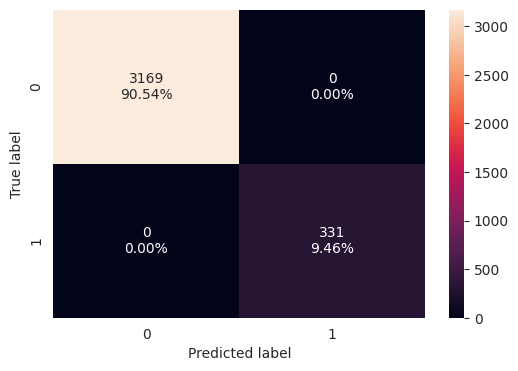

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Visualizing the Decision Tree**

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


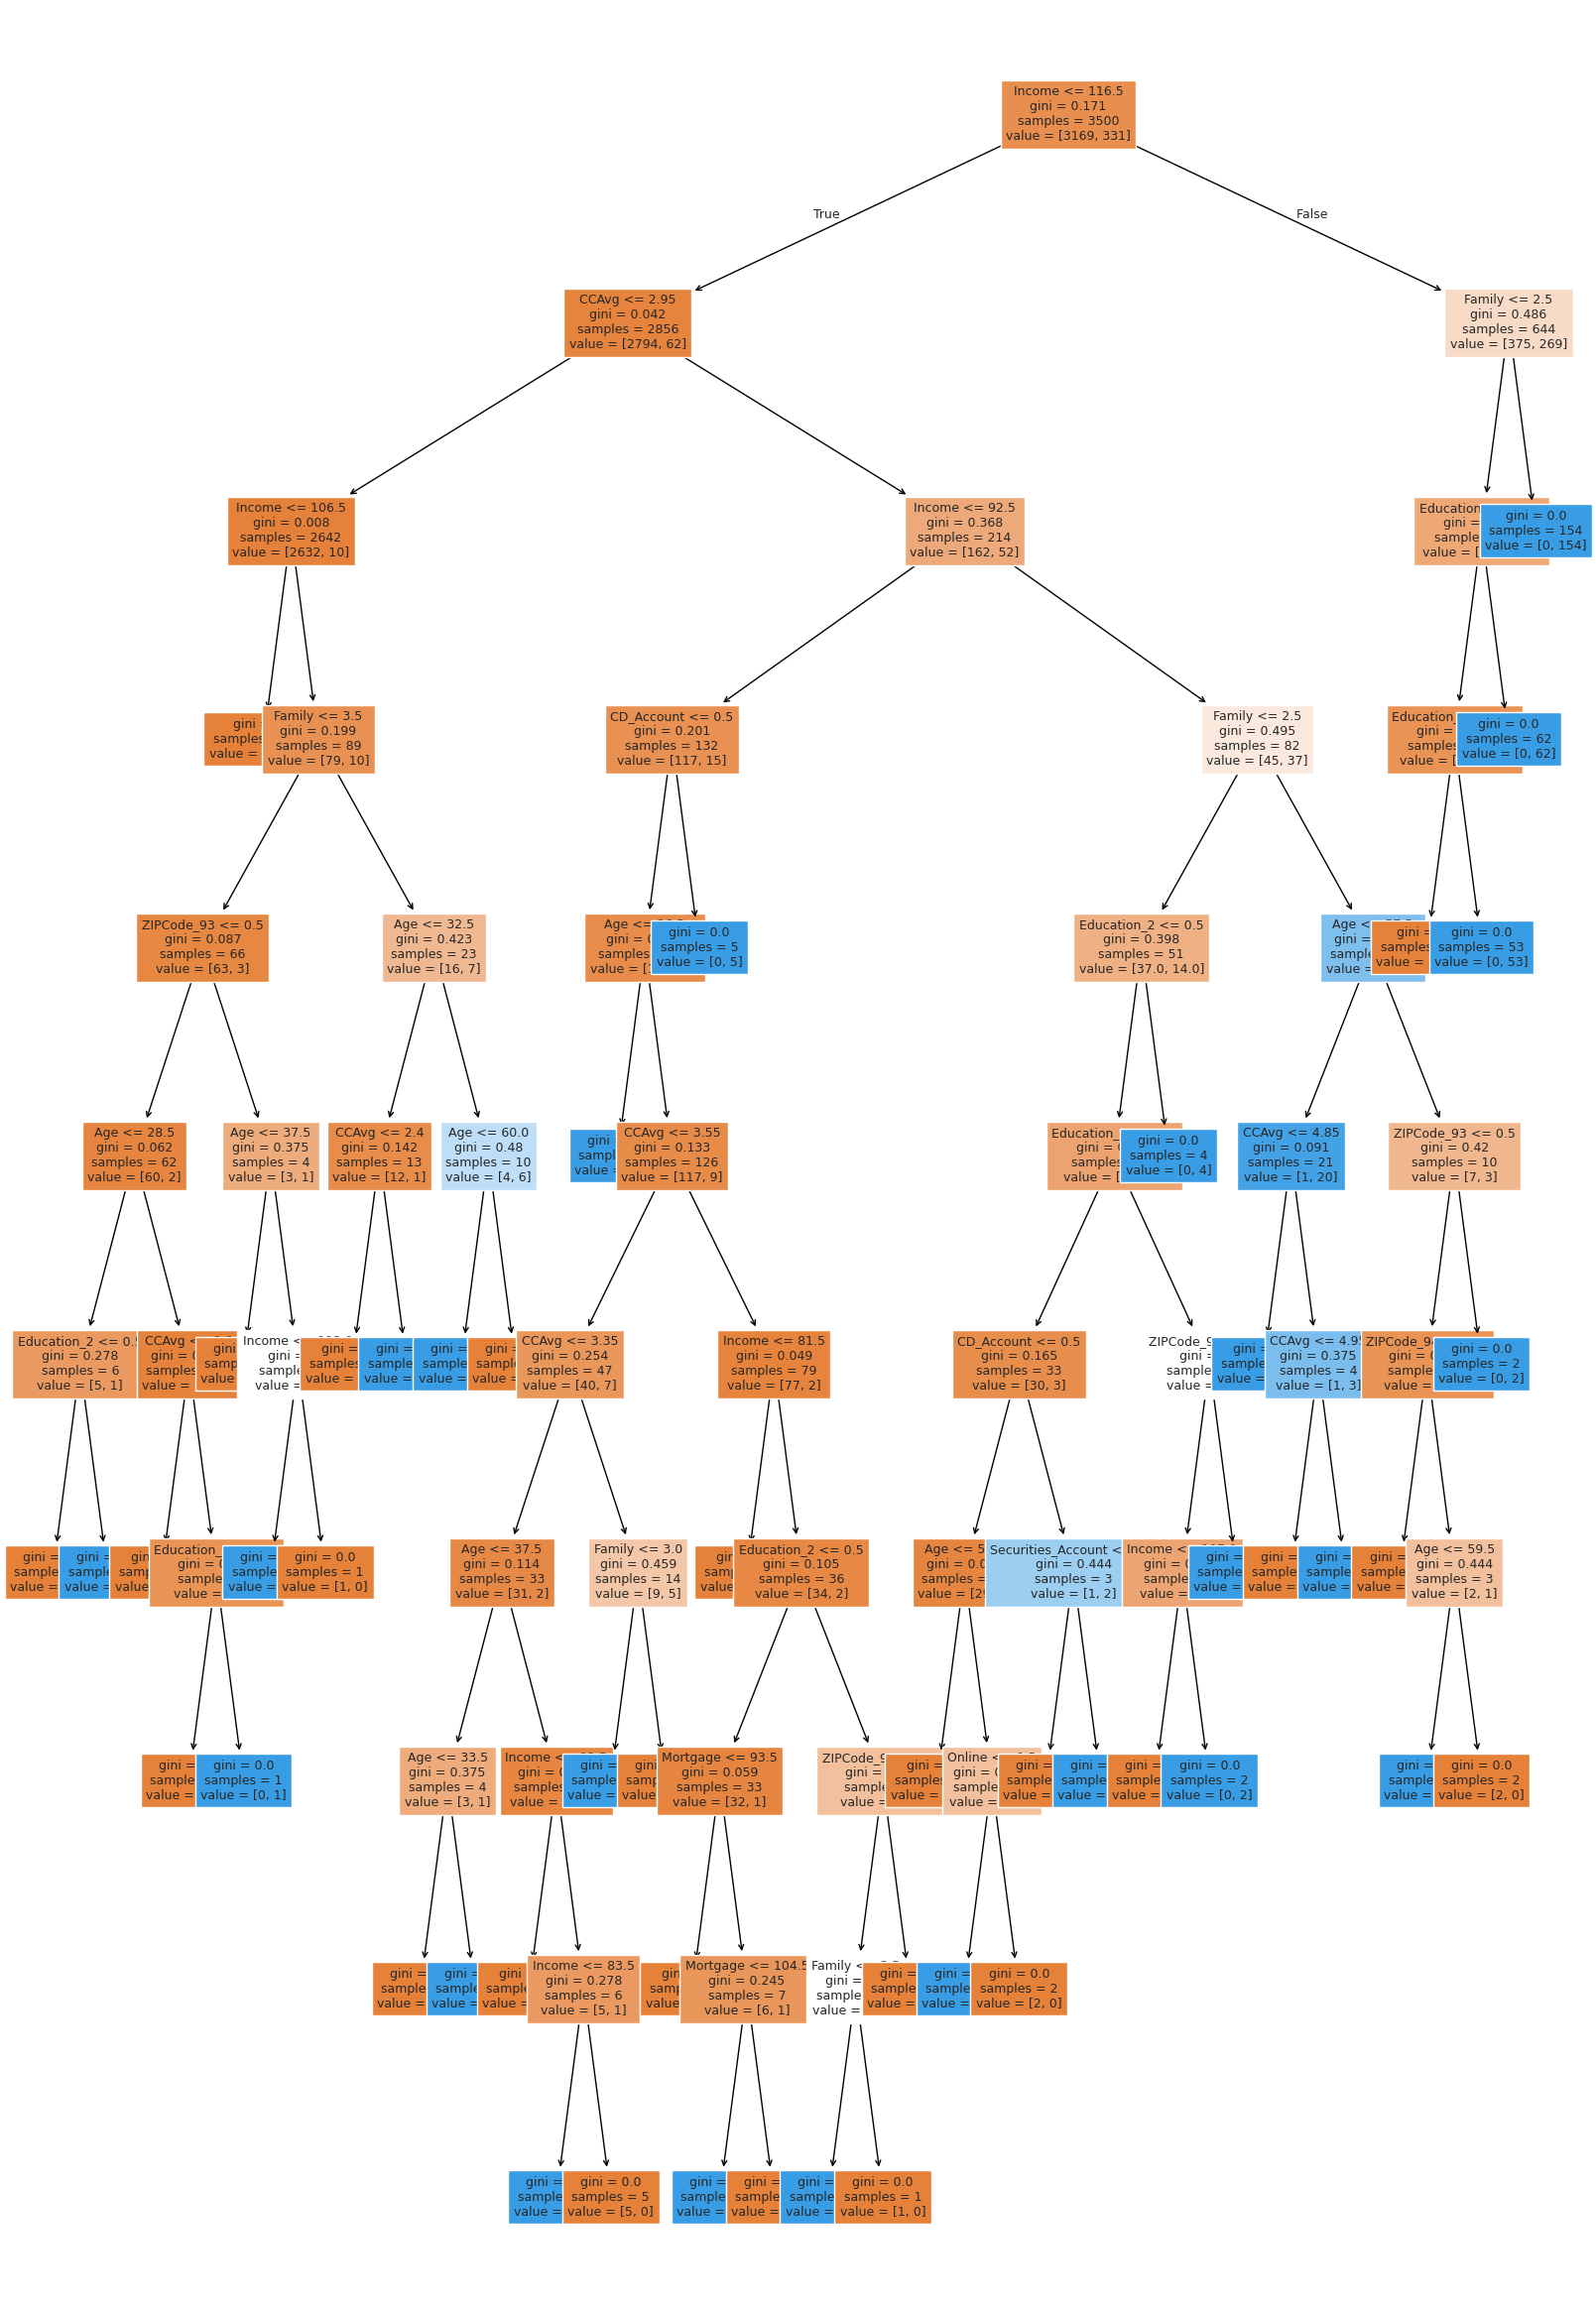

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


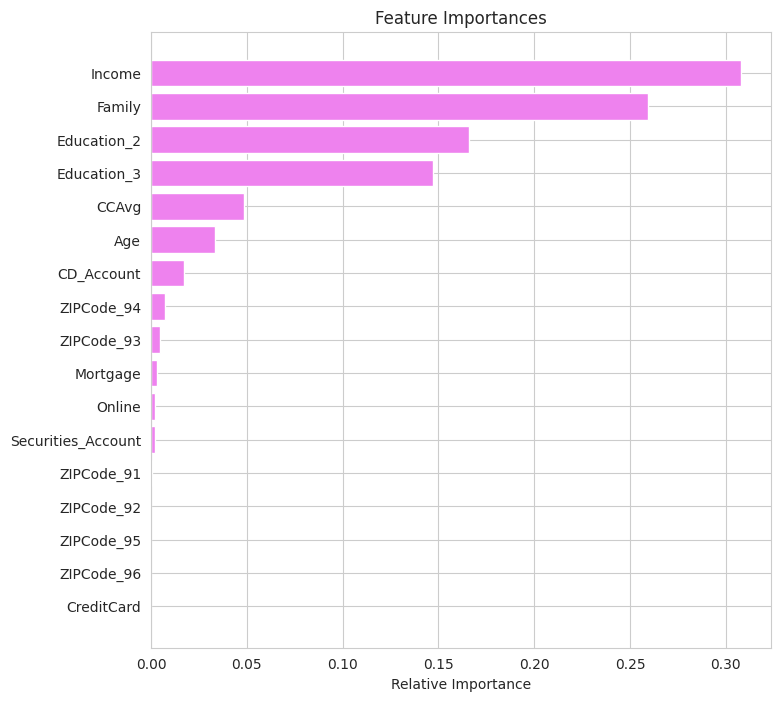

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking model performance on test data**

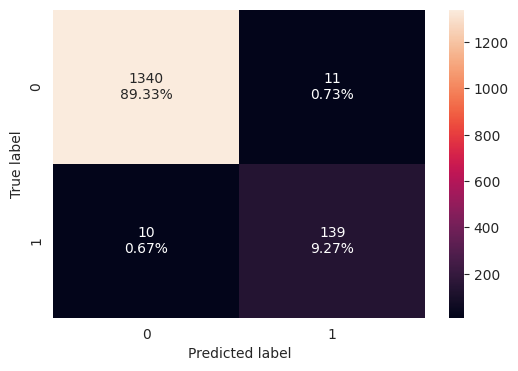

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


## Model Performance Improvement

**Pre-pruning**

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [ ]:
# Fit the best algorithm to the data.
estimator = best_estimator
estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

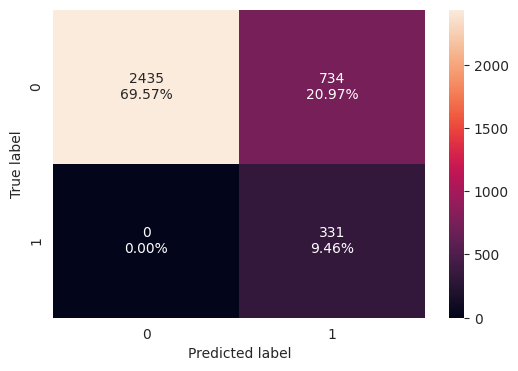

In [ ]:
# Checking performance on training data
confusion_matrix_sklearn(estimator, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


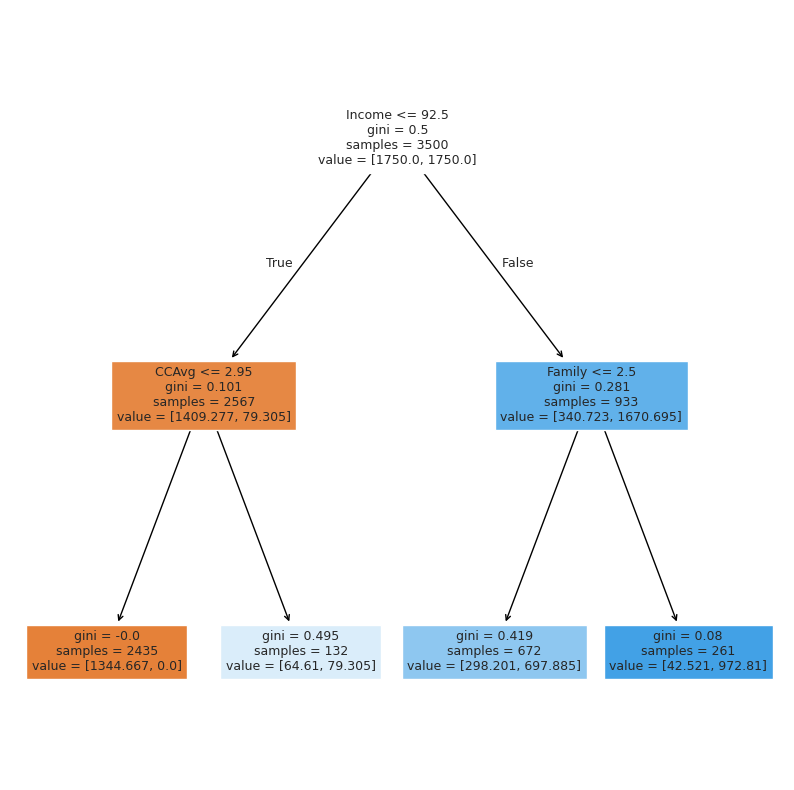

In [ ]:
#Visualizing the Decision Tree
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.876529
CCAvg               0.066940
Family              0.056531
Age                 0.000000
ZIPCode_92          0.000000
Education_2         0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
Education_3         0.000000


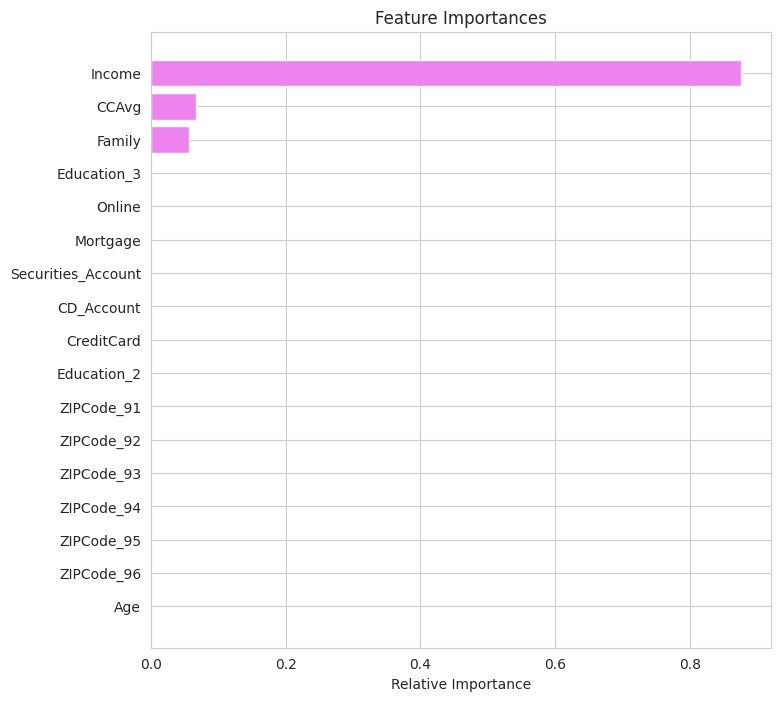

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

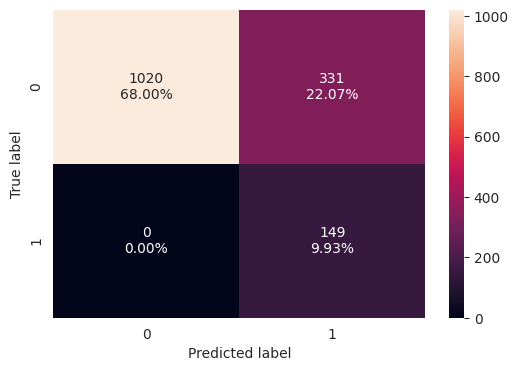

In [ ]:
#Checking performance on test data
confusion_matrix_sklearn(estimator, X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


**Post-pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


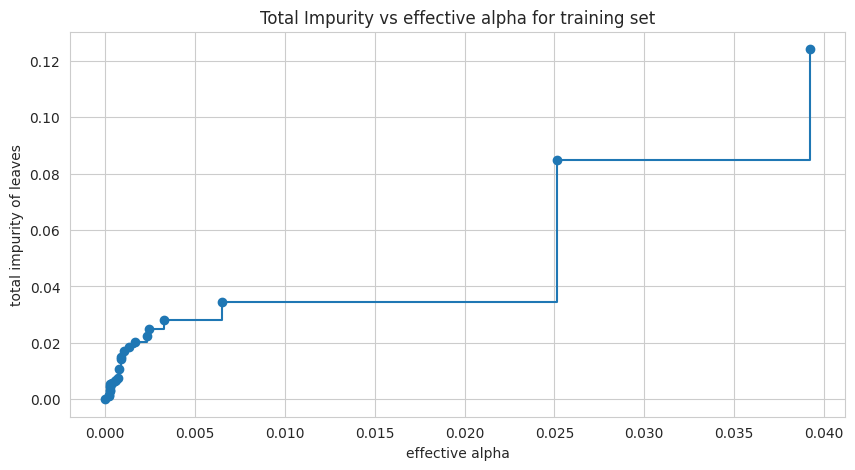

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


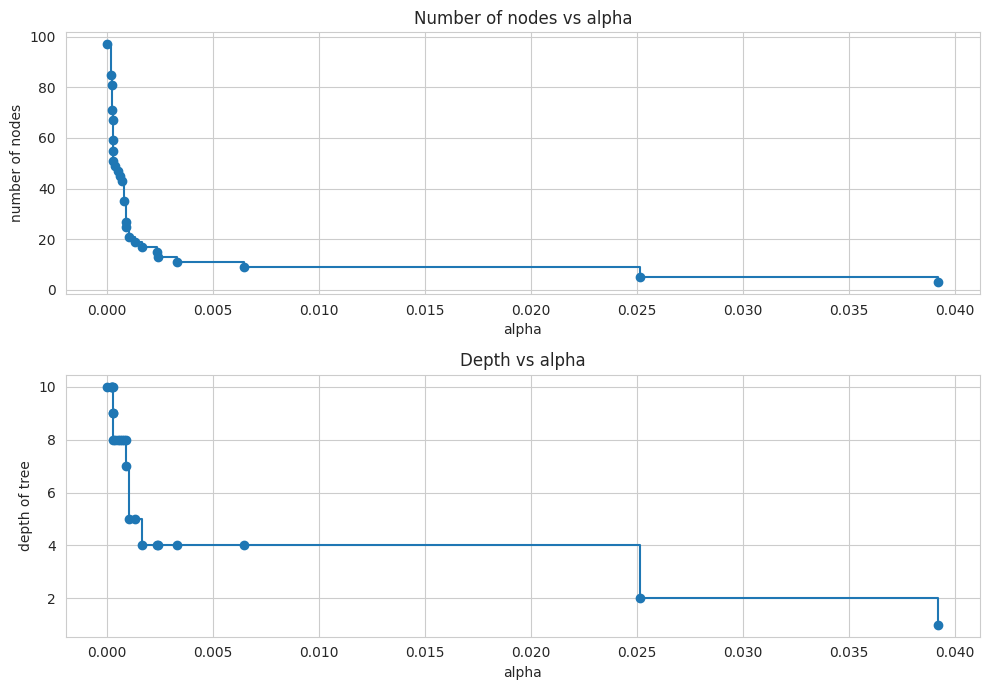

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
# Recall vs alpha for training and testing sets
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

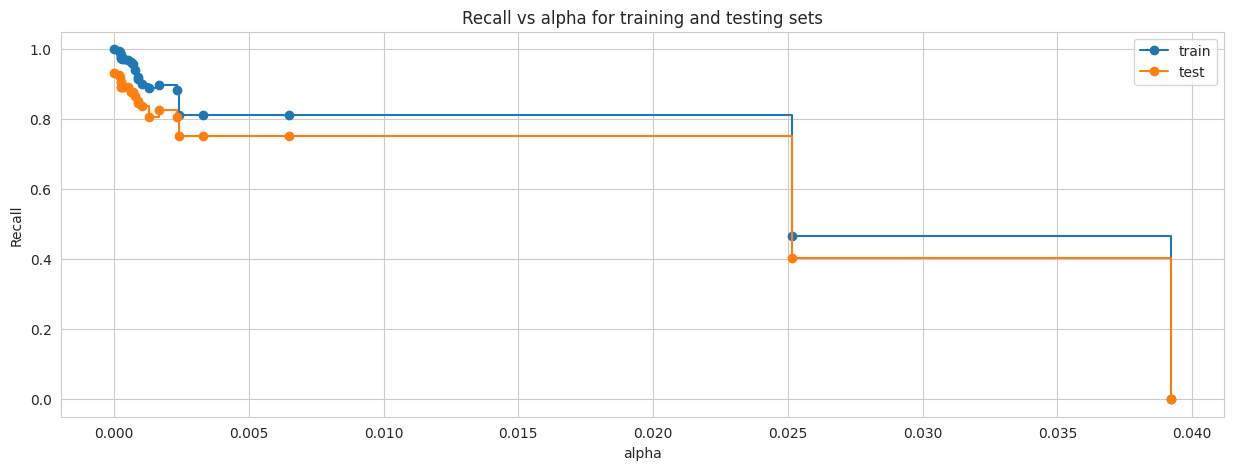

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.00027210884353741507, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00027210884353741507,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

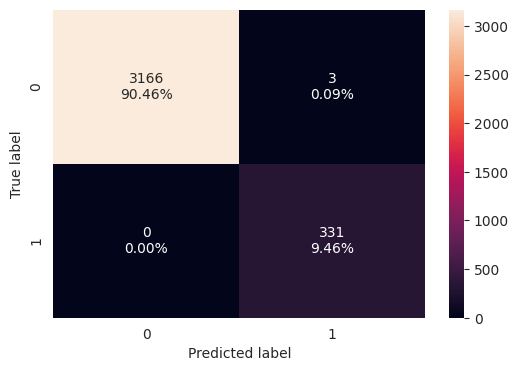

In [ ]:
#Checking performance on training data
confusion_matrix_sklearn(estimator_2, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.999143,1.0,0.991018,0.995489


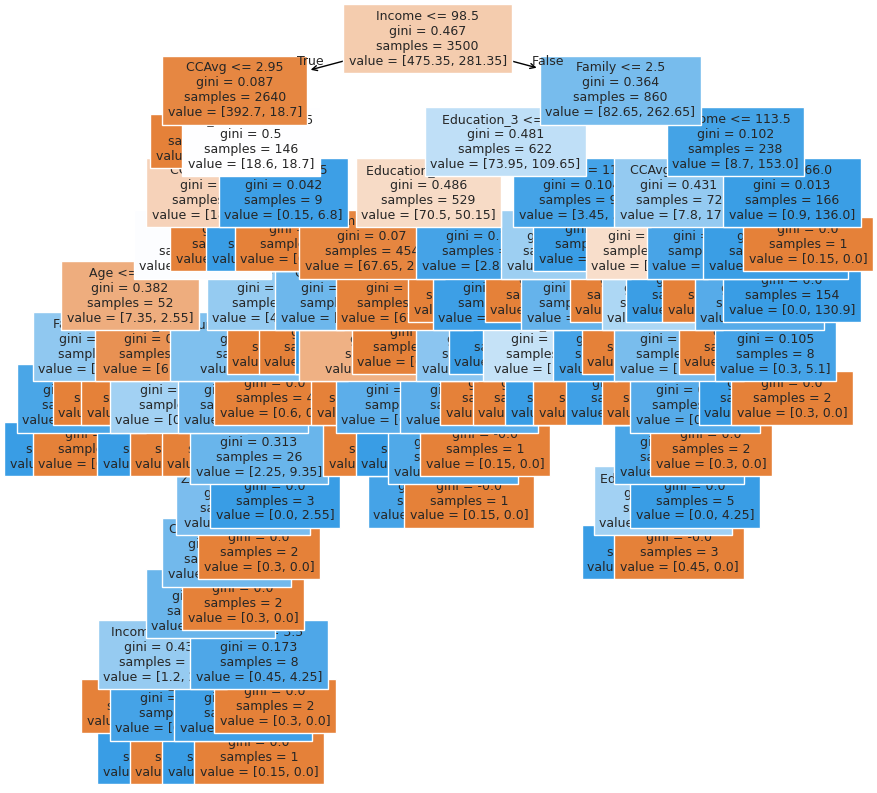

In [ ]:
#Visualizing the Decision Tree
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Education_3 >  

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.598659
Education_2         0.138693
CCAvg               0.078911
Education_3         0.067460
Family              0.066408
Age                 0.018238
CD_Account          0.011027
Mortgage            0.005053
Securities_Account  0.004728
ZIPCode_94          0.003990
ZIPCode_91          0.003596
CreditCard          0.002434
ZIPCode_92          0.000804
Online              0.000000
ZIPCode_93          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000


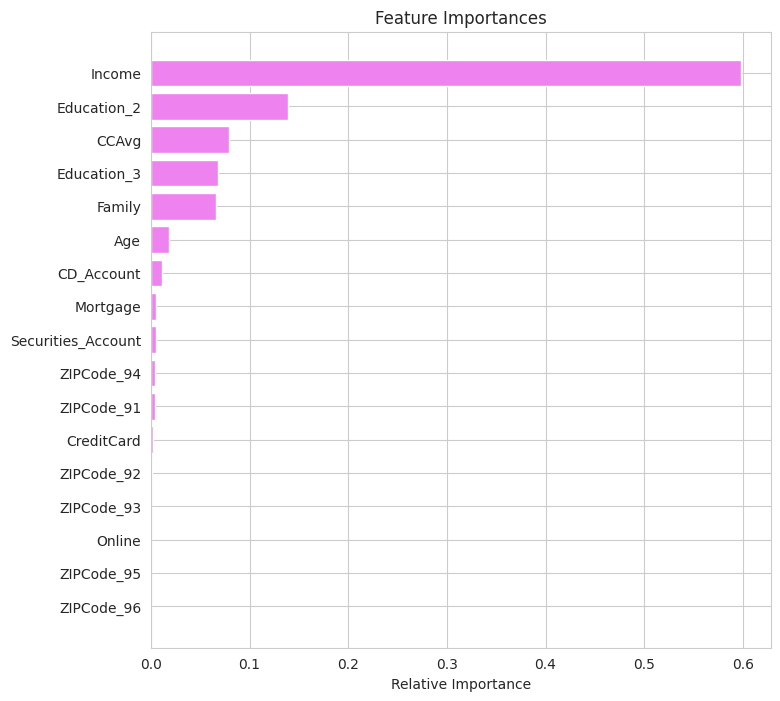

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

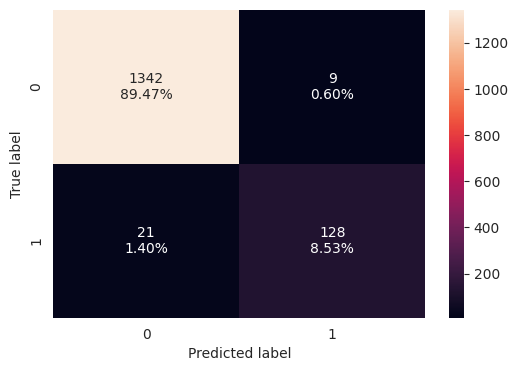

In [ ]:
# Checking performance on test data
confusion_matrix_sklearn(estimator_2, X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test) ## Complete the code to get the model performance on test data
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.98,0.85906,0.934307,0.895105


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790286,0.999143
Recall,1.0,1.000000,1.000000
Precision,1.0,0.310798,0.991018
F1,1.0,0.474212,0.995489


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.779333,0.980000
Recall,0.932886,1.000000,0.859060
Precision,0.926667,0.310417,0.934307
F1,0.929766,0.473768,0.895105


**Recommendations on Model Selection**
1. **Avoid the Sklearn Default Model** – It overfits the training data, leading to poor generalization on unseen test data. While it shows high accuracy and recall, it is unreliable for real-world scenarios.
2. **Avoid the Pre-Pruned Model** – It is over-pruned, causing a loss of predictive power. While it achieves 100% recall, it has very low precision, meaning too many false positives, making it ineffective for accurate loan approvals.
3. **Choose the Post-Pruned Model** – This model provides the best balance of accuracy, recall, and precision, making it the most reliable choice for deployment. It reduces overfitting while maintaining strong classification performance.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**Key Insights :**
1. High-income customers are more likely to take personal loans.
    * Customers earning above 100K per year have a higher loan acceptance rate.
2. Customers with high credit card spending (CCAvg) are good loan prospects.
    * Those spending over $2.5K per month on credit cards are more likely to take a loan.
3. Higher education levels correlate with loan acceptance.
    * Advanced degree holders are more likely to take loans.
4. CD account holders show a higher tendency to accept loans.
    * Customers with a Certificate of Deposit (CD) account have a higher loan approval rate.
5. Online banking & multi-bank credit card users are key segments.
    * Customers using online banking & credit cards from other banks have a higher likelihood of taking loans.

**Business Recommendations**
1. Target High-Income & High-Spending Customers.
   * Offer exclusive loan deals to customers earning over 100K or spending >2.5K on credit cards.
   * Use pre-approved loan offers via email & mobile banking.

2. Focus on Educated Professionals.
  * Create special loan packages for professionals with advanced degrees.
  * Partner with companies & universities to promote personal loans.

3. Cross-Sell to CD Account Holders.
  * Offer personal loans with CD benefits to increase engagement.
  * Provide faster loan approvals for CD account holders.

4. Improve Digital Loan Offers.
  * Give discounts for online loan applications to attract digital banking users.
  * Promote loan transfer options for customers using credit cards from other banks.

5. Reduce False Approvals & Optimize Targeting.
  * Use better criteria for loan approvals to avoid excessive marketing costs.
  * Focus on creditworthiness & spending behavior, not just demographics.

___